<a href="https://colab.research.google.com/github/Sai0210/Home_Assignment_3/blob/main/Question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load IMDB dataset
max_words = 5000  # Vocabulary size
max_len = 500  # Maximum review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define LSTM model
model = Sequential([
    Embedding(max_words, 128),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# Train model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate model
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 720s 2s/step - accuracy: 0.6888 - loss: 0.5707 - val_accuracy: 0.8267 - val_loss: 0.3999
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.8097 - loss: 0.4200 - val_accuracy: 0.8469 - val_loss: 0.3623
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.8498 - loss: 0.3534 - val_accuracy: 0.8491 - val_loss: 0.3677
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.8066 - loss: 0.4176 - val_accuracy: 0.8142 - val_loss: 0.4240
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 738s 2s/step - accuracy: 0.8629 - loss: 0.3253 - val_accuracy: 0.8562 - val_loss: 0.3439
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 264ms/step


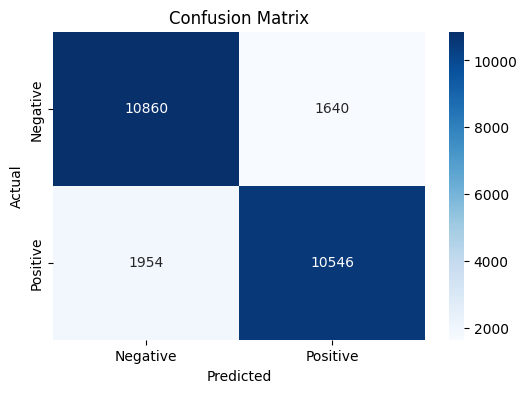

              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86     12500
    Positive       0.87      0.84      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [5]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(cr)
